In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join(r'..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
import importlib
import timeseries
importlib.reload(timeseries)
pass

In [3]:
import numpy as np
import pandas as pd

In [4]:
#data = pd.read_csv(r'..\data\cve_tweets-full.csv', encoding='iso-8859-1', low_memory=False)

In [5]:
#data['timestamp'] = data['timestamp'].apply(lambda x: pd.to_datetime(x))
#data['day'] = data['timestamp'].apply(lambda x: x.date())

In [6]:
#dated = data.groupby('day')['timestamp'].count().reset_index()

In [7]:
#dated.to_csv(r'..\data\cve_tweets_by_day.csv', index=False)
dated = pd.read_csv(r'..\data\cve_tweets_by_day.csv')

In [8]:
import re

def list_cves(string):
    tokens = re.findall(r"(?i)CVE-\d{4}-\d{4,7}", string)
    result = []
    for token in tokens:
        token = token.upper().strip()
        result.append(token)
    return result

def tweets_by_cve_by_day():
    accumulator = { }
    for index, row in data.iterrows():
        tokens = list_cves(row['tweet'])
        for i in range(len(tokens)):
            key = row['day'].strftime('%Y-%m-%d') + '#' + tokens[i]
            cve = accumulator.get(key, 0)
            accumulator[key] = cve + 1
    return accumulator

212 212 212


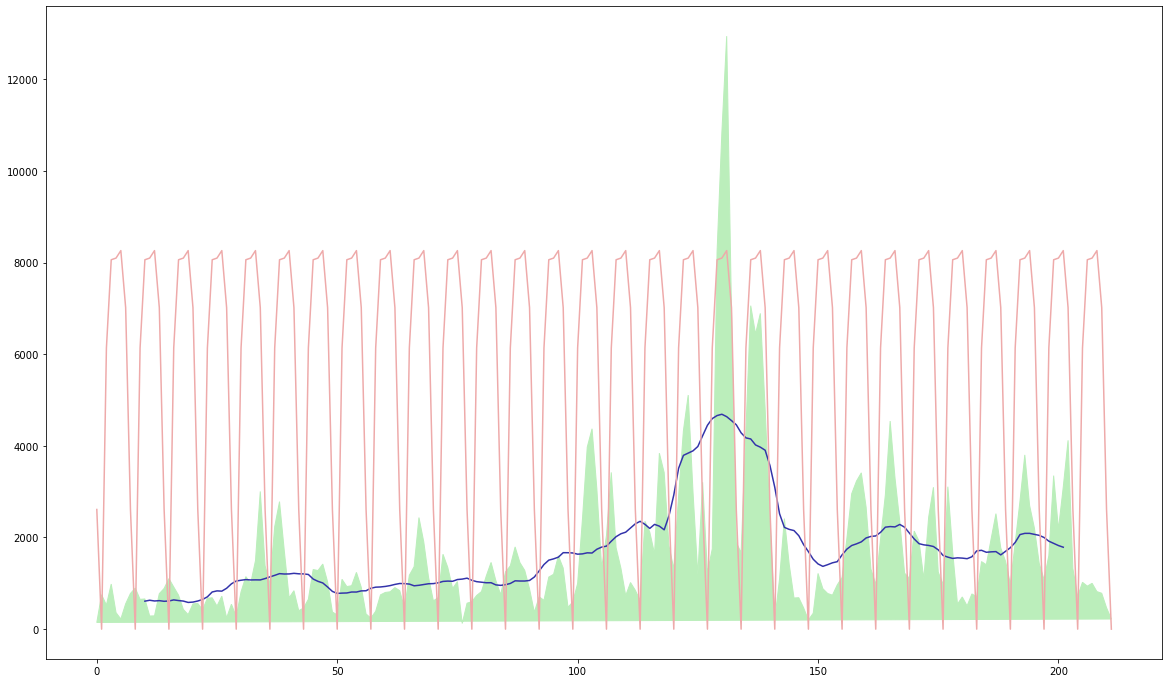

In [9]:
from matplotlib import pyplot as plt

# source
series = dated['timestamp'].tolist()
# trend (2 x cycle)
ra = timeseries.rolling_average(series, 21)
# seasonal
ct = timeseries.cyclic_trend(series, 7)
# residual

print (len(series), len(ra), len(ct))

plt.figure(figsize=(20, 12))
plt.fill(range(len(ra)), series, color='#BBEEBB')
plt.plot(range(len(ra)), ra, color='#3333AA')
plt.plot(range(len(ra)), ct, color='#EEAAAA')

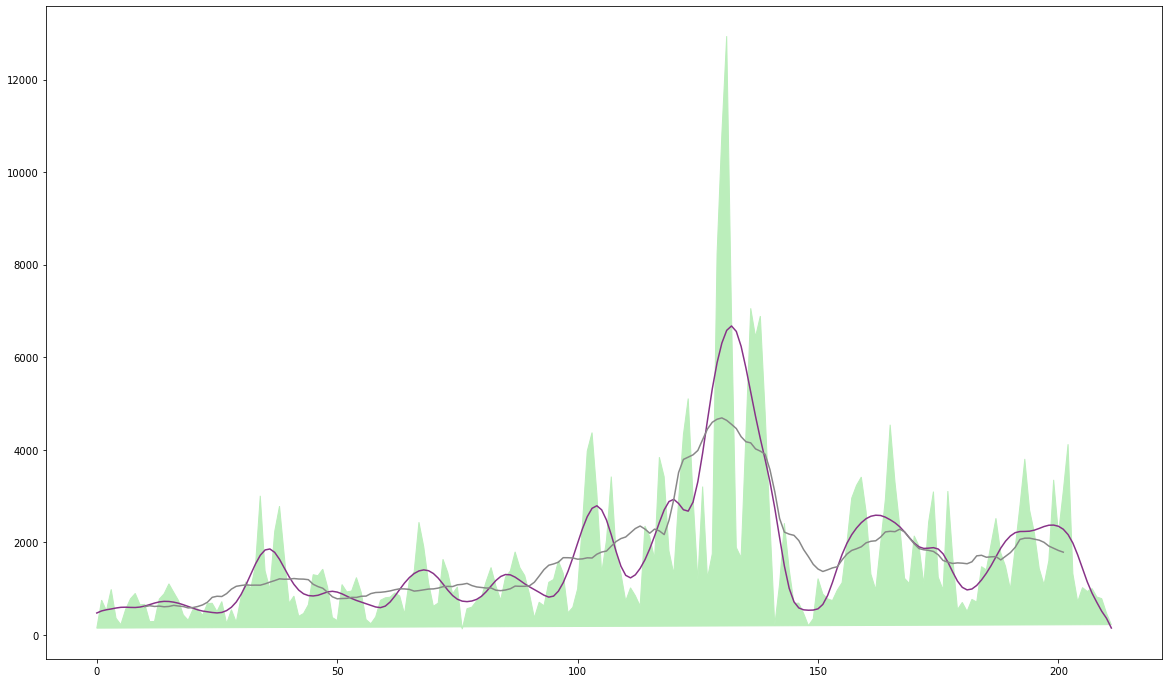

In [22]:
def base_patterns(series, cycles):
    if not isinstance(cycles, list): 
        cycles = [cycles]
    base = [timeseries.mean(series)] * len(series) #series.copy()
    for cycle in cycles:
        pattern = timeseries.identify_cycle(series,cycle)
        for i in range(len(series)):
            base[i] = base[i] / pattern[i % cycle]
    return base

def sub(seriesA, seriesB):
    diff = []
    for i in range(len(seriesA)):
        diff.append(seriesA[i] - seriesB[i])
    return diff

h = timeseries.Henderson(series, 21)
b = base_patterns(series, [7,30])
r = timeseries.rolling_average(series, 21)

plt.figure(figsize=(20, 12))
plt.fill(range(len(series)), series, color='#BBEEBB')
#plt.plot(range(len(series)), b, color='#3333AA')
plt.plot(range(len(series)), h, color='#883388')
plt.plot(range(len(series)), r, color='#888888')
        

In [ ]:
importlib.reload(movingrange)

number_of_records = 50
values = np.random.randint(1,51,number_of_records)
periods = range(number_of_records)

x = movingrange.movingrange(12)
x.load_from_arrays(periods, values)

In [ ]:
x.plot()

In [ ]:
x.rules.basic_rules()

In [ ]:
x.rules.western_electic_rules()

In [ ]:
x.rules.nelson_rules()

In [ ]:
x.describe()

In [ ]:
x.segments[len(x.segments) - 1].describe()